This notebook reduces the BZ.mat data to the smaller video file `sampled_video.npy`

# Load data

In [1]:
import h5py
import numpy as np

mat_dict = {}
with h5py.File('data/BZ.mat', 'r') as f:
  for k, v in f.items():
    mat_dict[k] = np.array(v)
complete_video = mat_dict['BZ_tensor']

In [2]:
complete_video = np.swapaxes(complete_video,1,2)
# t vs y vs x
T = complete_video.shape[0]
M = complete_video.shape[1]
N = complete_video.shape[2]
complete_video.shape

(1200, 351, 451)

# Visualize the video

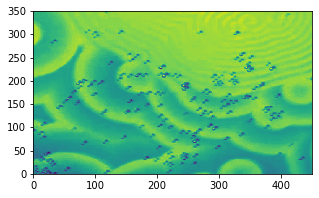

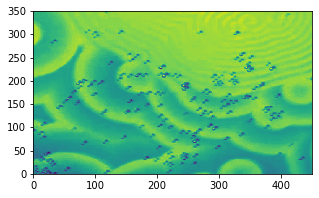

In [3]:
import util
# Visualize just the last few frames of the video.
util.visualize_video(complete_video[T - 30:T:5,:,:])

# Subsample the data

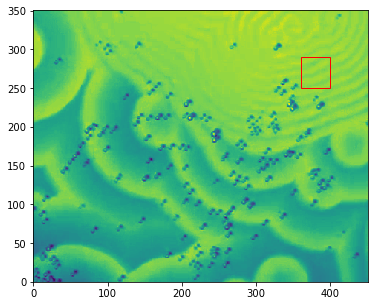

In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
DPI = 120
IMG_PATH_PREFIX = 'writeup/images/'

fig, ax = plt.subplots(figsize=(int(5 * 450/ 350), 5))
frame = complete_video[-1,:,:]
ax.pcolormesh(frame, shading='interp')

# Create a Rectangle patch
rect = patches.Rectangle((360,250),40,40,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

fig.savefig(IMG_PATH_PREFIX + 'movie_window.png', format='png', dpi=DPI)

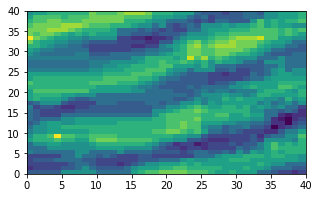

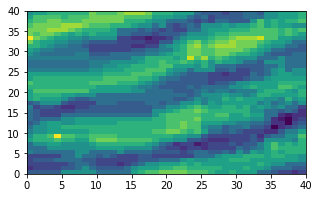

In [5]:
sampled_video = complete_video[T-250:T:5,250:290, 360:400] 
util.visualize_video(sampled_video)

In [6]:
sampled_video.shape

(50, 40, 40)

In [7]:
np.save('data/sampled_video.npy', sampled_video)